## LIBROSA 

Spectrograms = how the audio spectrum varies as a function of time.
- 2D np arrays
- first axis is frequency, second axis is time
- sr = sampling rate (Hz)
- frame = short audio clip (spectrgram column)
- n_fft = samples per frame
- hop_length = nr of samples between frames

Default settings:
- sr: 22050
- n_fft: 2048
- hop_length: 512

Spectral features
- are used to analyze harmony or timbre. 
- CQT measures the energy in each pitch
- Chroma measures the energy in each pitch class.

In [27]:
#!pip install librosa
import librosa
from librosa import display
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# default 22Khz mono
# time series, sampling rate
y, sr = librosa.load(librosa.util.example_audio_file())

In [1]:
mylist= os.listdir('/home/lorena/Documents/speech-emotion-recognition/Audio_Speech_Actors_01-24/Actor_01')

In [2]:
type(mylist)

list

In [4]:
print(mylist[0])

03-01-02-02-01-02-01.wav


In [8]:
# data = sr * T(duration of the recording)

data, sampling_rate = librosa.load('/home/lorena/Documents/speech-emotion-recognition/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

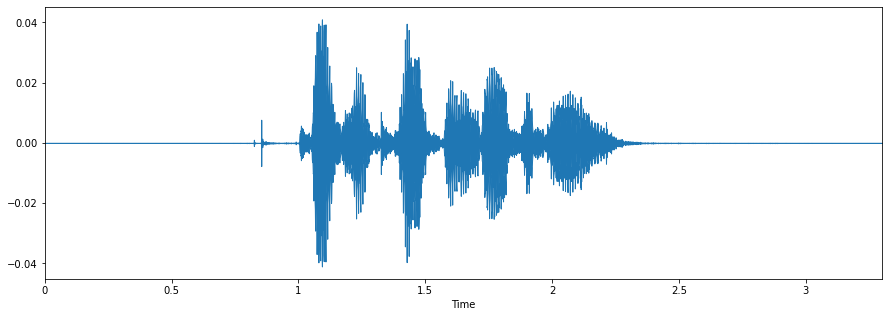

In [14]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
plt.xaxis("Time")
plt.ylabe("Amplitude")
plt.show()

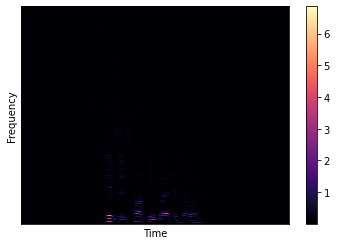

In [41]:
# short time fourier transform
stft = librosa.stft(data)
spectrogram = np.abs(stft)
librosa.display.specshow(spectrogram, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

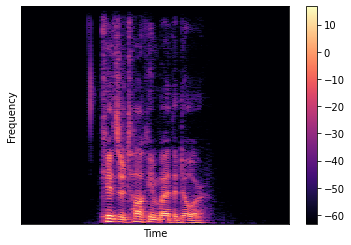

In [42]:
# log spectrogram
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

In [36]:
# constant-q transform (instead of stft)
librosa.cqt(data, sampling_rate)

array([[-1.0053458e-06-1.3582038e-08j, -2.5118661e-07+5.0236207e-07j,
        -7.7287979e-07+3.3558868e-07j, ...,
        -3.8303736e-07-1.4796158e-05j, -1.4354778e-05-2.3273954e-06j,
        -4.9579658e-06+1.3474271e-05j],
       [-2.9357686e-06-1.4196180e-08j, -1.3780466e-06+3.0863980e-06j,
         3.0900298e-06+3.2959699e-06j, ...,
         3.9641986e-06-9.8185683e-06j, -8.1962580e-06-3.7324223e-06j,
        -3.1261402e-06+7.7347167e-06j],
       [ 9.2160853e-06+2.3750576e-07j,  8.6463606e-06-4.8790280e-06j,
         4.7400654e-06-1.0535669e-05j, ...,
        -7.7150080e-06+2.9201631e-06j, -5.7824091e-06+6.2698655e-06j,
        -1.4805399e-06+8.6809832e-06j],
       ...,
       [ 3.0372698e-06+9.1004573e-08j,  0.0000000e+00+0.0000000e+00j,
         2.0150715e-07+3.6221510e-07j, ...,
         3.2332935e-06+2.3031944e-06j,  2.5797697e-09-1.0109831e-08j,
         0.0000000e+00+0.0000000e+00j],
       [ 3.1370269e-06-8.9531945e-08j,  0.0000000e+00+0.0000000e+00j,
        -2.8907053e-07

In [20]:
Audio(data=data, rate=sampling_rate)

TypeError: 'module' object is not callable

In [28]:
# fft spectrum
fft = np.fft.fft(data)
fft

array([ 0.06667195+8.11850587e-16j, -0.0600817 +6.52619435e-04j,
        0.03079933-1.01554493e-02j, ...,  0.00614893-2.03039672e-02j,
        0.03079933+1.01554493e-02j, -0.0600817 -6.52619435e-04j])

In [29]:
# magnitude = contribution of each frequency to the sound
magnitude = np.abs(fft)
magnitude

array([0.06667195, 0.06008524, 0.03243042, ..., 0.02121463, 0.03243042,
       0.06008524])

In [30]:
# linspace: nr of evenly spaced nrs in an interval between 0 Hz and sr Hz
frequency = np.linspace(0, sampling_rate, len(magnitude))
frequency

array([0.00000000e+00, 3.02730755e-01, 6.05461510e-01, ...,
       2.20493945e+04, 2.20496973e+04, 2.20500000e+04])

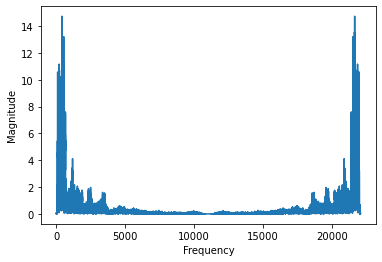

In [32]:
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

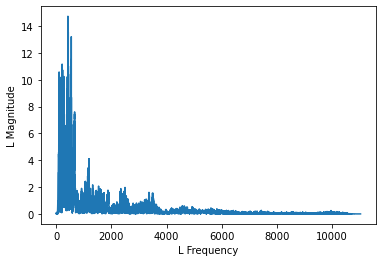

In [33]:
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel("L Frequency")
plt.ylabel("L Magnitude")
plt.show()

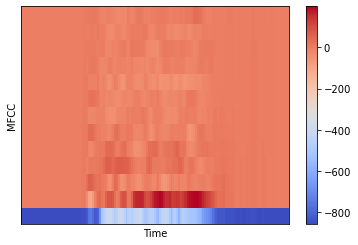

In [46]:
mfcc = librosa.feature.mfcc(data, n_mfcc=13)
librosa.display.specshow(mfcc, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()